# DATA WRANGLING

C/W = Comply with

> C/W - Using the repo setup directions, setup a new local and remote repository named clustering-exercises s. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named clustering-exercises

> C/W - Save your clustering work in your clustering-exercises repo. Then add, commit, and push your changes.

> C/W - For example, if the exercise directs you to create a file named myfile.py, you should have clustering/myfile.py in your repository.

> C/W - If a file extension is specified, you should create that specific file. If there is not file extension specified, you may either create a python script or a jupyter notebook for the exercise.

Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.

Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.

Remember to run your code often to check for correct output and/or errors.

### Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

## IMPORT

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w

from pydataset import data
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

# # Stats
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import TweedieRegressor
# from sklearn.linear_model import LassoLars
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire and Summarize

Acquire data from the cloud database. - C/W

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database. - C/W

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - C/W

Only include properties that have a latitude and longitude value. C/W

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.) - C/W


In [2]:
df = w.get_zillow_data()

csv file found and loaded


In [3]:
df.shape

(77613, 69)

In [4]:
# sort values by transactiondate
df = df.sort_values(by='transactiondate', ascending=False)

# Drop duplicate rows in column: 'parcelid', keeping last transaction date
df = df.drop_duplicates(subset=['parcelid'], keep='last')

# drop all properties that have a latitude and longitude values
# this will drop all the null from the latitude and longitude columns
# only dropped 232 rows
df = df.dropna(subset=['latitude','longitude'])

In [5]:
# 232 rows were dropped from the latitude and longitude columns
df.shape

(77381, 69)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 77612 to 0
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   heatingorsystemtypeid         49440 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   parcelid                      77381 non-null  int64  
 7   propertylandusetypeid         77381 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [7]:
cols_to_remove = ['typeconstructiontypeid','storytypeid','heatingorsystemtypeid','buildingclasstypeid'
                  ,'architecturalstyletypeid','airconditioningtypeid','id','pooltypeid10'
                  ,'pooltypeid2','pooltypeid7','rawcensustractandblock','regionidcity','regionidcounty'
                 ,'regionidneighborhood','regionidzip','censustractandblock','id.1','landtaxvaluedollarcnt'
                 ,'taxamount']

In [8]:
df = w.remove_columns(df, cols_to_remove)
df

,parcelid,propertylandusetypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,taxdelinquencyyear,propertylandusedesc,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
77612,12826780,261.0,NaN,2.0,3.0,6.0,2.0,NaN,NaN,1762.0,...,NaN,Single Family Residential,0.007204,2017-09-25,NaN,NaN,NaN,Central,NaN,NaN
77611,12773139,261.0,NaN,1.0,3.0,4.0,1.0,NaN,NaN,1032.0,...,NaN,Single Family Residential,0.037129,2017-09-21,Central,NaN,NaN,Central,NaN,NaN
77610,17239384,261.0,NaN,2.0,4.0,NaN,2.0,NaN,1612.0,1612.0,...,NaN,Single Family Residential,0.013209,2017-09-21,NaN,NaN,NaN,NaN,NaN,NaN
77609,11000655,261.0,NaN,2.0,2.0,6.0,2.0,NaN,NaN,1286.0,...,NaN,Single Family Residential,0.020615,2017-09-20,NaN,NaN,NaN,Central,NaN,NaN
77608,10833991,266.0,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1741.0,...,NaN,Condominium,-0.002245,2017-09-20,Central,NaN,NaN,Central,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,17143294,266.0,NaN,2.0,3.0,NaN,2.0,NaN,842.0,1492.0,...,NaN,Condominium,-0.020526,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,10887214,266.0,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,...,NaN,Condominium,0.006940,2017-01-01,Central,NaN,NaN,Central,NaN,NaN
3,12177905,261.0,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,...,NaN,Single Family Residential,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN
2,14186244,261.0,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,...,NaN,Single Family Residential,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [9]:
w.summarize(df)

SUMMARY REPORT
          
          
Dataframe head: 
       parcelid  propertylandusetypeid  basementsqft  bathroomcnt  bedroomcnt  \
77612  12826780                  261.0           NaN          2.0         3.0   
77611  12773139                  261.0           NaN          1.0         3.0   
77610  17239384                  261.0           NaN          2.0         4.0   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  \
77612                    6.0                2.0         NaN   
77611                    4.0                1.0         NaN   
77610                    NaN                2.0         NaN   

       finishedfloor1squarefeet  calculatedfinishedsquarefeet  ...  \
77612                       NaN                        1762.0  ...   
77611                       NaN                        1032.0  ...   
77610                    1612.0                        1612.0  ...   

       taxdelinquencyyear        propertylandusedesc  logerror  \
77612                

In [14]:
object_cols = w.get_object_cols(df)

In [15]:
num_cols = w.get_numeric_cols(df)

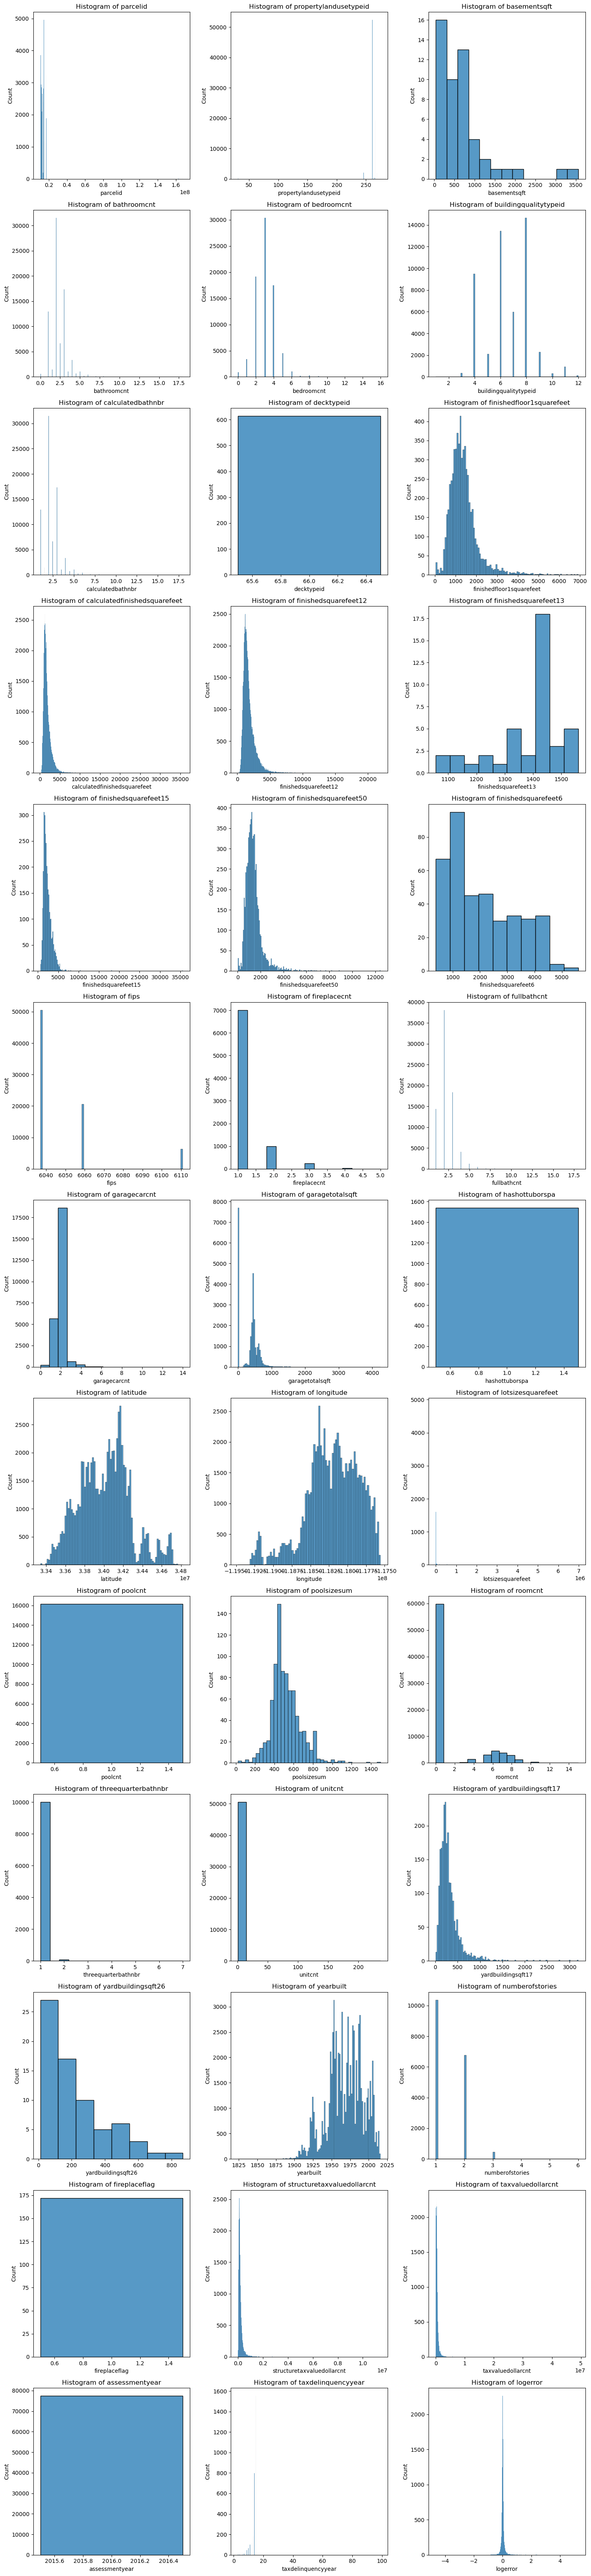

In [16]:
num_cols = len(w.get_numeric_cols(df))
num_rows, num_cols_subplot = divmod(num_cols, 3)
if num_cols_subplot > 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, col in enumerate(w.get_numeric_cols(df)):
    row_idx, col_idx = divmod(i, 3)
    sns.histplot(df[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. - C/W

The output should look like the table below:

In [10]:
cols_missing = w.nulls_by_col(df).sort_values(by='percent_rows_missing', ascending=False)
cols_missing.head()

,num_rows_missing,percent_rows_missing
buildingclassdesc,77366,99.980615
finishedsquarefeet13,77340,99.947015
basementsqft,77331,99.935385
storydesc,77331,99.935385
yardbuildingsqft26,77311,99.909539


### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
rows_missing = w.nulls_by_row(df, index_id='customer_id')

In [12]:
rows_missing.sort_values(by='num_rows', ascending=True)

,num_cols_missing,percent_cols_missing,num_rows
36,24,48.0,2.0
16,25,50.0,2.0
17,24,48.0,3.0
31,25,50.0,16.0
32,25,50.0,23.0
...,...,...,...
5,23,46.0,NaN
4,23,46.0,NaN
3,24,48.0,NaN
2,25,50.0,NaN


## Prepare

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [13]:
df.propertylandusetypeid.value_counts()

261.0    52320
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [20]:
df.head().T

,77612,77611,77610,77609,77608
parcelid,12826780,12773139,17239384,11000655,10833991
propertylandusetypeid,261.0,261.0,261.0,261.0,266.0
bathroomcnt,2.0,1.0,2.0,2.0,3.0
bedroomcnt,3.0,3.0,4.0,2.0,3.0
buildingqualitytypeid,6.0,4.0,NaN,6.0,8.0
calculatedbathnbr,2.0,1.0,2.0,2.0,3.0
calculatedfinishedsquarefeet,1762.0,1032.0,1612.0,1286.0,1741.0
finishedsquarefeet12,1762.0,1032.0,1612.0,1286.0,1741.0
fips,6037.0,6037.0,6111.0,6037.0,6037.0
fullbathcnt,2.0,1.0,2.0,2.0,3.0


In [21]:
#Maybe there are some houses with no square footage?
no_sqft = df[df['calculatedfinishedsquarefeet'] == 0]
len(no_sqft)

0

In [22]:
#What about nonexistent lots?
no_lot = df[df['lotsizesquarefeet'] == 0]
len(no_lot)

0

In [25]:
#Maybe ones that have no bedrooms?
no_beds = df[df['bedroomcnt'] == 0]
len(no_beds)

625

In [26]:
#Maybe ones that have no bathrooms?
no_bath = df[df['bathroomcnt'] == 0]
len(no_bath)

387

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [28]:
df = w.handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75)
df

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,propertylandusedesc,logerror,transactiondate,heatingorsystemdesc
77612,12826780,261.0,2.0,3.0,6.0,2.0,1762.0,1762.0,6037.0,2.0,...,0.0,1.0,1955.0,140000.0,522000.0,2016.0,Single Family Residential,0.007204,2017-09-25,Central
77611,12773139,261.0,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,1.0,...,0.0,1.0,1954.0,32797.0,49546.0,2016.0,Single Family Residential,0.037129,2017-09-21,Central
77610,17239384,261.0,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,2.0,...,7.0,NaN,1964.0,50683.0,67205.0,2016.0,Single Family Residential,0.013209,2017-09-21,NaN
77609,11000655,261.0,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,2.0,...,0.0,1.0,1940.0,70917.0,354621.0,2016.0,Single Family Residential,0.020615,2017-09-20,Central
77608,10833991,266.0,3.0,3.0,8.0,3.0,1741.0,1741.0,6037.0,3.0,...,0.0,1.0,1980.0,265000.0,379000.0,2016.0,Condominium,-0.002245,2017-09-20,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,17143294,266.0,2.0,3.0,NaN,2.0,1492.0,1492.0,6111.0,2.0,...,6.0,NaN,1982.0,198640.0,331064.0,2016.0,Condominium,-0.020526,2017-01-01,NaN
4,10887214,266.0,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,...,0.0,1.0,1964.0,73681.0,119407.0,2016.0,Condominium,0.006940,2017-01-01,Central
3,12177905,261.0,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,0.0,1.0,1970.0,108918.0,145143.0,2016.0,Single Family Residential,-0.103410,2017-01-01,Central
2,14186244,261.0,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,6.0,NaN,1962.0,85289.0,564778.0,2016.0,Single Family Residential,0.005383,2017-01-01,NaN


In [31]:
#use our function to see how many nulls we have left
null_clean = w.nulls_by_col(df)

#take a look at top 10 null columns
null_clean.sort_values(by='percent_rows_missing', ascending=False).head(10)

,num_rows_missing,percent_rows_missing
heatingorsystemdesc,27714,35.920367
buildingqualitytypeid,27483,35.620966
propertyzoningdesc,26886,34.847189
unitcnt,26596,34.471317
lotsizesquarefeet,8156,10.571066
finishedsquarefeet12,3406,4.414548
calculatedbathnbr,388,0.502890
fullbathcnt,388,0.502890
structuretaxvaluedollarcnt,85,0.110169
yearbuilt,75,0.097208


In [32]:
df.shape

(77154, 25)